In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree, ensemble
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [56]:

import numpy as np # linear algebra
import pandas as pd 

In [57]:
rawData = pd.read_csv('dataset1.csv')
rawData.head()

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Output
0,138,8.6,560,7.46,0.62,0.70,5.9,0.24,0.31,0.77,8.71,0.11,0
1,213,7.5,338,7.62,0.75,1.06,25.4,0.30,0.86,1.54,2.89,2.29,0
2,163,9.6,718,7.59,0.51,1.11,14.3,0.30,0.86,1.57,2.70,2.03,0
3,157,6.8,475,7.64,0.58,0.94,26.0,0.34,0.54,1.53,2.65,1.82,0
4,270,9.9,444,7.63,0.40,0.86,11.8,0.25,0.76,1.69,2.43,2.26,1


In [34]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       880 non-null    int64  
 1   P       880 non-null    float64
 2   K       880 non-null    int64  
 3   pH      880 non-null    float64
 4   EC      880 non-null    float64
 5   OC      880 non-null    float64
 6   S       880 non-null    float64
 7   Zn      880 non-null    float64
 8   Fe      880 non-null    float64
 9   Cu      880 non-null    float64
 10  Mn      880 non-null    float64
 11  B       880 non-null    float64
 12  Output  880 non-null    int64  
dtypes: float64(10), int64(3)
memory usage: 89.5 KB


In [35]:
rawData.describe()

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Output
count,880.00000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000
mean,246.73750,14.562159,499.978409,7.510500,0.543659,0.617989,7.545080,0.469273,4.140523,0.952443,8.666500,0.590159,0.588636
std,77.38886,21.967755,124.222838,0.464912,0.141597,0.842986,4.424184,1.894234,3.110011,0.465900,4.298828,0.570800,0.575462
min,6.00000,2.900000,11.000000,0.900000,0.100000,0.100000,0.640000,0.070000,0.210000,0.090000,0.110000,0.060000,0.000000
25%,201.00000,6.800000,412.000000,7.350000,0.430000,0.380000,4.700000,0.280000,2.050000,0.630000,6.225000,0.270000,0.000000
50%,257.00000,8.100000,475.000000,7.500000,0.545000,0.590000,6.640000,0.360000,3.565000,0.930000,8.345000,0.405000,1.000000
75%,307.00000,10.550000,581.000000,7.630000,0.640000,0.780000,8.750000,0.470000,6.320000,1.250000,11.472500,0.610000,1.000000
max,383.00000,125.000000,887.000000,11.150000,0.950000,24.000000,31.000000,42.000000,44.000000,3.020000,31.000000,2.820000,2.000000


In [36]:
rawData['Output'].value_counts()

Output
1    440
0    401
2     39
Name: count, dtype: int64

In [37]:
rawDataCopy = rawData.copy()
rawDataCopy.head()

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Output
0,138,8.6,560,7.46,0.62,0.70,5.9,0.24,0.31,0.77,8.71,0.11,0
1,213,7.5,338,7.62,0.75,1.06,25.4,0.30,0.86,1.54,2.89,2.29,0
2,163,9.6,718,7.59,0.51,1.11,14.3,0.30,0.86,1.57,2.70,2.03,0
3,157,6.8,475,7.64,0.58,0.94,26.0,0.34,0.54,1.53,2.65,1.82,0
4,270,9.9,444,7.63,0.40,0.86,11.8,0.25,0.76,1.69,2.43,2.26,1


In [38]:
corr = rawDataCopy.corr()

<Axes: >

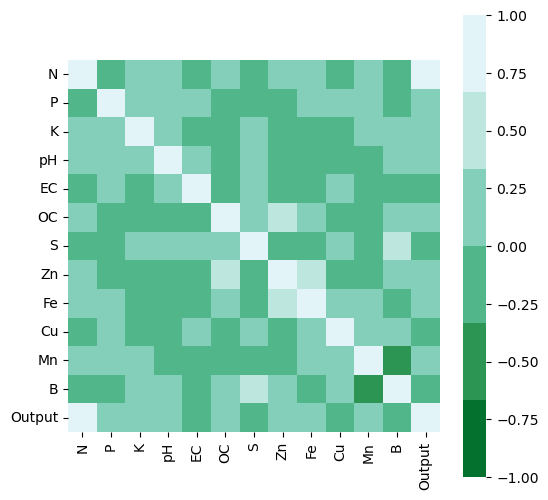

In [39]:
f, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(corr,
    cmap=sns.color_palette("BuGn_r"),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

In [40]:
labels = rawDataCopy[['Output']]
features = rawDataCopy.drop('Output', axis=1)

In [41]:
features.head()

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B
0,138,8.6,560,7.46,0.62,0.70,5.9,0.24,0.31,0.77,8.71,0.11
1,213,7.5,338,7.62,0.75,1.06,25.4,0.30,0.86,1.54,2.89,2.29
2,163,9.6,718,7.59,0.51,1.11,14.3,0.30,0.86,1.57,2.70,2.03
3,157,6.8,475,7.64,0.58,0.94,26.0,0.34,0.54,1.53,2.65,1.82
4,270,9.9,444,7.63,0.40,0.86,11.8,0.25,0.76,1.69,2.43,2.26


In [42]:
labels.head()

,Output
0,0
1,0
2,0
3,0
4,1



Caching the list of root modules, please wait!
(This will only be done once - type '%rehashx' to reset cache!)



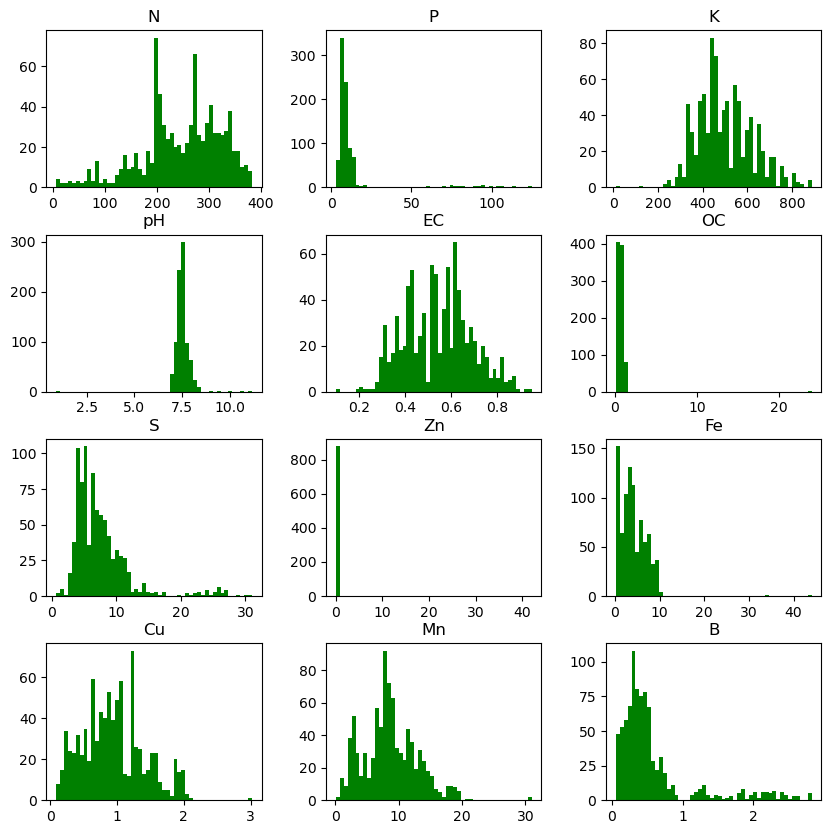

In [43]:
features.hist(bins=50, figsize=(10, 10), color ='green', grid=False)
plt.show()

In [44]:
transformedFeatures = features.apply(lambda x: np.log10(x) if np.issubdtype(x.dtype, np.number) else x)

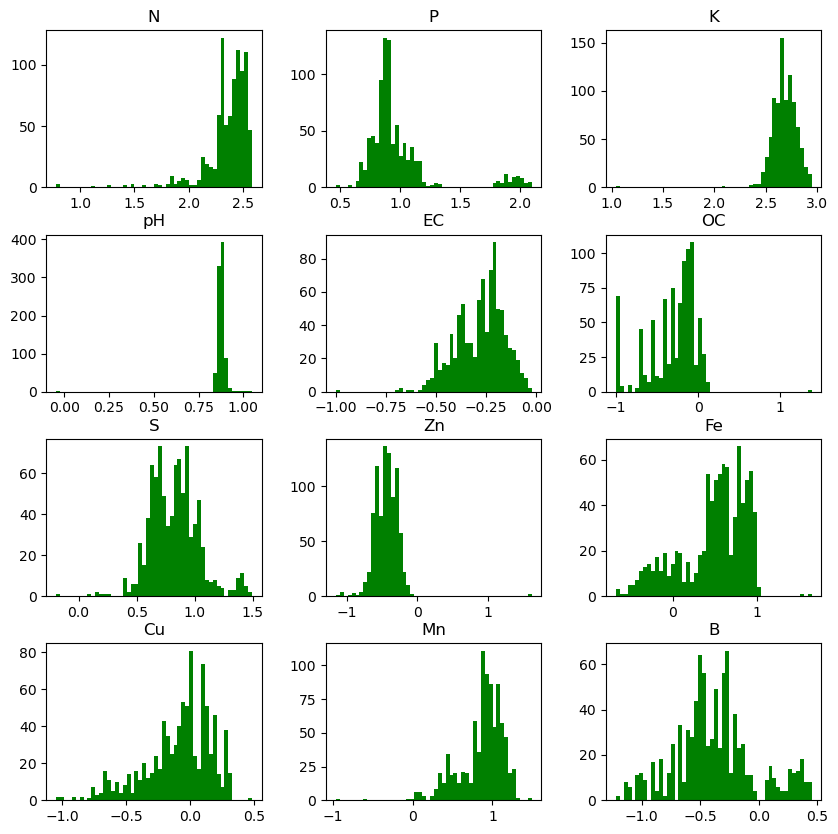

In [45]:
transformedFeatures.hist(bins=50, figsize=(10, 10), color='green', grid=False)
plt.show()

In [62]:
from sklearn.model_selection import train_test_split

trainInput, validationInput, trainTarget, validationTarget = train_test_split(transformedFeatures, labels, test_size = 0.2, shuffle=True, random_state = 42)
print("Train Data Shape: ", trainInput.shape)

Train Data Shape:  (704, 12)


In [47]:
trainTarget = trainTarget.values.ravel()

In [48]:
svcClf = SVC()
svcClf.fit(trainInput, trainTarget)

SVC()

In [49]:
forestClf = ensemble.RandomForestClassifier()
forestClf.fit(trainInput, trainTarget)

RandomForestClassifier()

In [50]:
nbClf = GaussianNB()
nbClf.fit(trainInput, trainTarget)

GaussianNB()

In [51]:
knnClf = KNeighborsClassifier()
knnClf.fit(trainInput, trainTarget)

KNeighborsClassifier()

In [52]:
treeClf = tree.DecisionTreeClassifier()
treeClf.fit(trainInput, trainTarget)

DecisionTreeClassifier()

SVC  accuarcy is  0.7897727272727273
RandomForestClassifier  accuarcy is  0.8693181818181818
GaussianNB  accuarcy is  0.5795454545454546
KNeighborsClassifier  accuarcy is  0.7329545454545454
DecisionTreeClassifier  accuarcy is  0.8409090909090909


<Axes: >

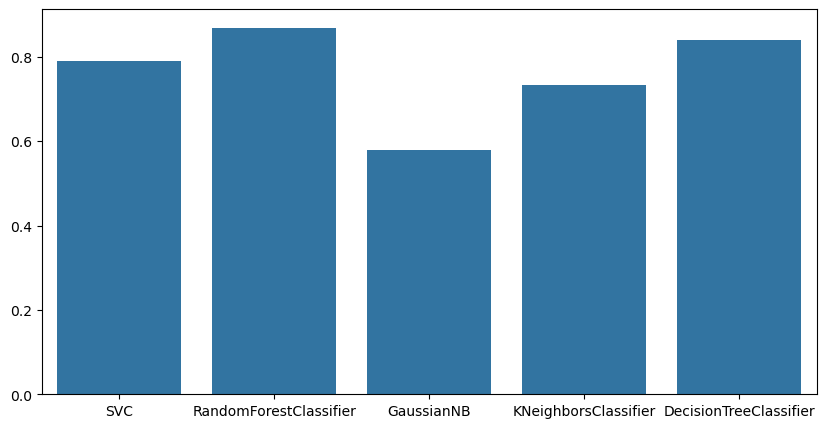

In [53]:
models = [svcClf, forestClf, nbClf, knnClf, treeClf]
accs = []
titles = []

for model in models:
    pred = model.predict((validationInput))
    model_acc = accuracy_score(validationTarget, pred)
    accs.append(model_acc)
    titles.append(type(model).__name__)
    print(type(model).__name__, " accuarcy is ", model_acc)

fig = plt.figure(figsize=(10, 5))
sns.barplot(x = titles, y=accs)

In [54]:
forestClassifier = ensemble.RandomForestClassifier(random_state=42)

In [55]:
paramGrid = { 
    'n_estimators': [200, 300, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4, 5, 6 ,7 ,8, 9, 10],
    'criterion' :['gini', 'entropy']
}

In [29]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(estimator=forestClassifier, param_grid=paramGrid, cv= 5)
clf.fit(trainInput, trainTarget)

c:\Users\Megha\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
210 fits failed out of a total of 630.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
210 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Megha\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Megha\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Megha\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Megha\anaconda3\Lib\site-packag

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 300, 500]})

In [64]:
randomForestModel = ensemble.RandomForestClassifier(criterion = 'gini',
 max_depth = 10,
 max_features = 'sqrt',
 n_estimators = 300, random_state=42)

In [65]:
randomForestModel.fit(trainInput, trainTarget)

c:\Users\Megha\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=10, n_estimators=300, random_state=42)

In [66]:
predictions = randomForestModel.predict(validationInput)

In [67]:
report = classification_report(validationTarget, predictions)
report

c:\Users\Megha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Megha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Megha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


'              precision    recall  f1-score   support\n\n           0       0.88      0.96      0.92        78\n           1       0.86      0.89      0.87        88\n           2       0.00      0.00      0.00        10\n\n    accuracy                           0.87       176\n   macro avg       0.58      0.62      0.60       176\nweighted avg       0.82      0.87      0.84       176\n'

In [68]:
mode_acc = accuracy_score(validationTarget, predictions)
mode_acc

0.8693181818181818

In [ ]:
import pickle

with open('random_forest_pkl.pkl', 'wb') as file:
    pickle.dump(model, file)

In [72]:
with open('random_forest_pkl.pkl', 'rb') as file:
    model = pickle.load(file)